In [52]:
import pandas as pd
import seaborn as sns

from american_gut_project.persist import load_dataframe


In [53]:
df = load_dataframe('agp_only_meta.csv')

/Users/srowan/.virtual_envs/agp/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (25,28,29,30,31,63,71,75,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,167,168,169,170,171,172,173,174,175,176,182,187,190,191,192,204,225,235,238,248,249,250,262,284,285,286,287,288,289,292,293,294,295,296,297,298,299,300,301,302,303,309,316) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [54]:
df.columns

Index(['index', 'sample_name', 'acid_reflux', 'acne_medication',
       'acne_medication_otc', 'add_adhd', 'age_cat', 'age_corrected',
       'age_years', 'alcohol_consumption',
       ...
       'vitamin_b_supplement_frequency', 'vitamin_d_supplement_frequency',
       'vivid_dreams', 'weight_cat', 'weight_change', 'weight_kg',
       'weight_units', 'whole_eggs', 'whole_grain_frequency', 'sample_id'],
      dtype='object', length=323)

In [55]:
df['autoimmune'].value_counts()

I do not have this condition                                         14612
Not provided                                                          5396
Diagnosed by a medical professional (doctor, physician assistant)     2035
Unspecified                                                            267
Self-diagnosed                                                         154
Diagnosed by an alternative medicine practitioner                       96
not applicable                                                          10
Not applicable                                                           1
Name: autoimmune, dtype: int64

In [56]:
df['cancer'].value_counts()

I do not have this condition                                         11553
Not provided                                                          9698
Diagnosed by a medical professional (doctor, physician assistant)      928
Unspecified                                                            378
not applicable                                                          10
Diagnosed by an alternative medicine practitioner                        3
Not applicable                                                           1
Name: cancer, dtype: int64

In [57]:
df['diabetes'].value_counts()

I do not have this condition                                         21216
Not provided                                                           691
Diagnosed by a medical professional (doctor, physician assistant)      424
Unspecified                                                            198
Self-diagnosed                                                          22
not applicable                                                          10
Diagnosed by an alternative medicine practitioner                        9
Name: diabetes, dtype: int64

In [ ]:
# Find useful targets

col_val_dict = {}
for c in df.columns:
    num_diagnosed = df[df[c] == 'Diagnosed by a medical professional (doctor, physician assistant)'][c].count()
    col_val_dict[c] = num_diagnosed

In [59]:
targets = pd.Series(col_val_dict).sort_values(ascending=False)
targets

skin_condition                                            4153
clinical_condition                                        3355
ibs                                                       2123
lung_disease                                              2064
autoimmune                                                2035
migraine                                                  1925
acid_reflux                                               1863
thyroid                                                   1643
cancer                                                     928
ibd                                                        842
fungal_overgrowth                                          785
cardiovascular_disease                                     783
add_adhd                                                   725
depression_bipolar_schizophrenia                           597
asd                                                        432
diabetes                                               

In [60]:
len(df)

22644

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
more_than_0 = targets[targets > 0]

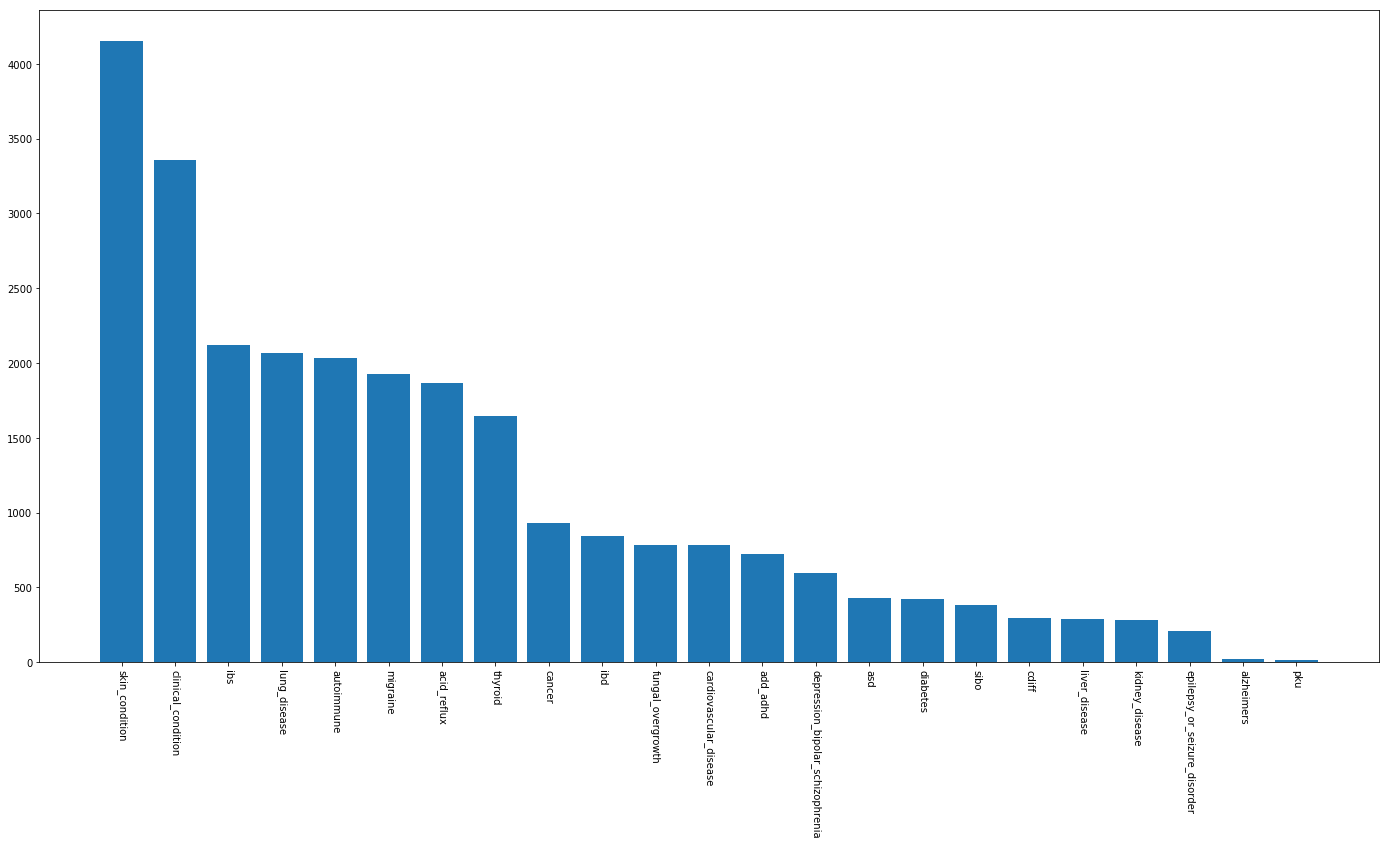

In [63]:
fig, axs = plt.subplots(figsize=(24, 12))
plt.xticks(rotation=-90)
axs.bar(x, y)
plt.show()